# Scale-invariance in real datasets

In [13]:
import sys

sys.path.append(sys.path[0] + "/..")  # Adds higher directory to python modules path.
import pickle
import numpy as np
from Scripts import renormalize, scomplex
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

plt.rcParams["text.usetex"] = True


colors = ["#02405c", "#fea600", "#a20655", "#5e96c5", "#4b3596", "#fa6ca9", "#8d6cf6"]
colors_curves = colors+ colors+ colors+ colors
cols = colors_curves

# Clique complexes

## Display scale-invariance parameters (Fig. 4c)

Load the pre-computed entropic susceptibilities of the real networks's clique complexes together with their null models, compute their scale-invariance parameters and plot them.

/Users/marconurisso/Desktop/Lavoro/Projects/Simplicial_Renormalization/HodgeLaplacianRenorm/higher_order_LRG/Notebooks/../Scripts/renormalize.py:86: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)
/Users/marconurisso/Desktop/Lavoro/Projects/Simplicial_Renormalization/HodgeLaplacianRenorm/higher_order_LRG/Notebooks/../Scripts/renormalize.py:86: RuntimeWarning: invalid value encountered in log
  sp_heat =  np.log(sp_heat)


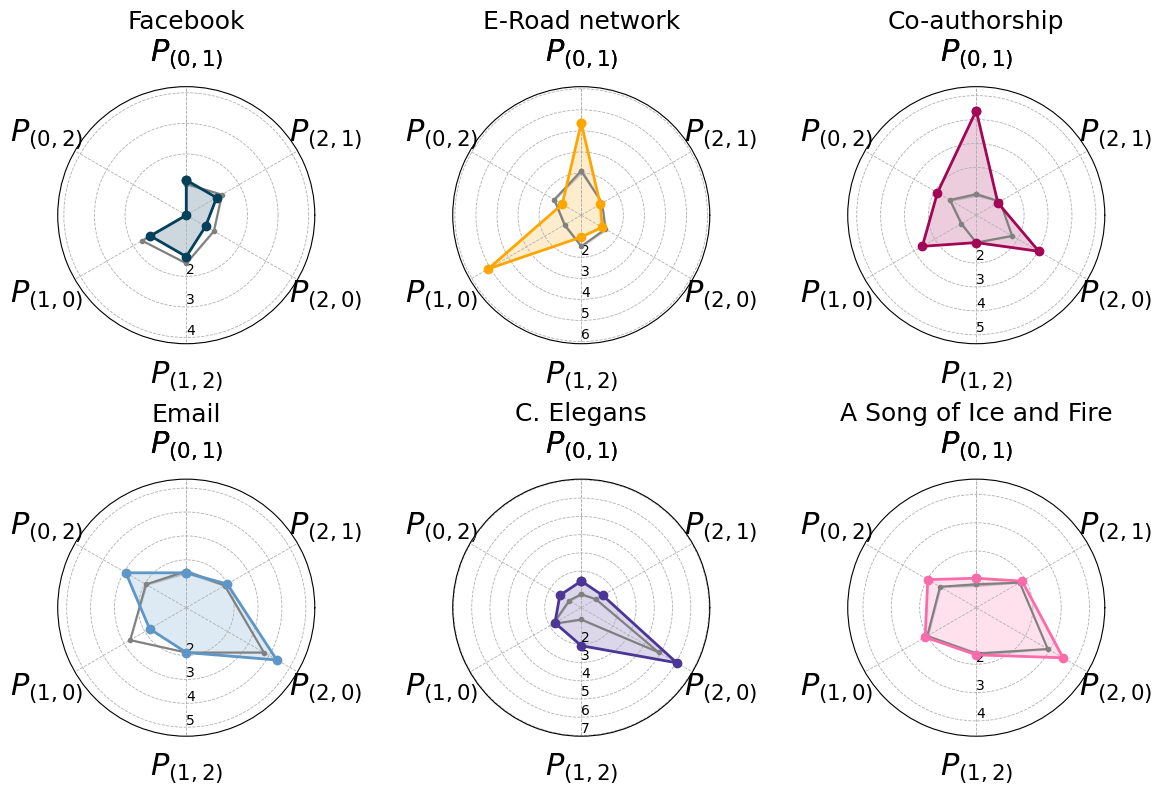

In [2]:
laplacians_types = ["01","02","10","12","20","21"]
nrep = 10 # Number of repetitions of the null model
taumin = -4 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval

ymin = -4

tau_space = np.logspace(taumin,taumax,ntau)

names = ["ego-facebook","subelj_euroroad_euroroad", "dimacs10-netscience", "arenas-email","dimacs10-celegans_metabolic","asoiaf"]
true_names = [r"Facebook",r"E-Road network",r"Co-authorship",r"Email",r"C. Elegans", r"A Song of Ice and Fire"]
fig = plt.figure(figsize = (4*3,4*2))
idx = 0

for nn,name in enumerate(names):
    # Load null model
    with open(f'../Data/C_curves/RealData/null_model/{name}_sp_heats.pickle', 'rb') as handle:
        C_curves_cm = pickle.load(handle)
    # Load entropic susceptibilities
    with open(f'../Data/C_curves/RealData/standard/{name}_sp_heats.pickle', 'rb') as handle:
        C_curves = pickle.load(handle)  
    
    measure = np.zeros(len(laplacians_types))
    measure_cm = np.zeros((len(laplacians_types),nrep))

    for i in range(len(laplacians_types)):
        measure[i] = renormalize.measure_SI(tau_space,C_curves[i],epsilon=0.15,ymin = ymin,ymax = 2,ny = 100)
        for n in range(nrep):
            measure_cm[i,n] = renormalize.measure_SI(tau_space,C_curves_cm[i][n],epsilon=0.15,ymin = ymin,ymax = 2,ny = 100)

    ax = plt.subplot(2,3,idx+1, polar=True)
    stats = measure
    stats_cm = np.mean(measure_cm,1)
    stats_cm_std = np.sqrt((nrep - 1)/nrep)*np.std(measure_cm,1)

    angles = np.mod(np.pi/2 + np.linspace(0, 2*np.pi, len(laplacians_types), endpoint=False),2*np.pi)
    stats = np.concatenate((stats,[stats[0]]))
    stats_cm = np.concatenate((stats_cm,[stats_cm[0]]))
    stats_cm_std = np.concatenate((stats_cm_std,[stats_cm_std[0]]))

    angles = np.concatenate((angles,[angles[0]]))
    ax.plot(angles,stats_cm,'o-',color = "gray", markersize = 3)
    ax.plot(angles, stats, 'o-', linewidth=2,color = colors_curves[idx])
    ax.fill(angles, stats, alpha=0.2,color = colors_curves[idx])
    ax.fill_between(angles, stats_cm + 1.96*stats_cm_std/np.sqrt(nrep),stats_cm - 1.96*stats_cm_std/np.sqrt(nrep), alpha=0.3, color = "gray")

    ax.set_xticks(angles,[f"$P_{{({l[0]},{l[1]})}}$" for l in laplacians_types+[laplacians_types[0]]],fontsize = 22)
    ax.set_rticks([ll for ll in range(2,int(max(np.max(measure)+2,5)))], fontsize =18)
    ax.set_rlabel_position(-90)  # Move radial labels away from plotted line
    ax.tick_params(axis='x', which='major', pad=13)

    ax.set_title(true_names[nn],fontsize = 18)
    ax.set_ylim(0,max(np.max(measure)+1,4.2))
    ax.grid(True)
    ax.grid(linewidth=0.6,linestyle = '--')

    idx+=1

plt.tight_layout()

## Clustering real networks according to their signature (Fig. 4d)

In [24]:
names = ['ego-facebook', 'subelj_euroroad_euroroad', 'dimacs10-netscience', 'arenas-email', 'dimacs10-celegans_metabolic', 'asoiaf', 'maayan-vidal', 'opsahl-powergrid', 'moreno_propro_propro', 'petster-friendships-hamster-uniq', 'autobahn', 'mixed.species_brain_1', 'rhesus_brain_2', 'mouse_visual.cortex_2', 'c.elegans_neural.male_1', 'iui.net', 'cora_cite.rn', 'Flensburg_Data_Links.csv', 'hessen', 'road-minnesota.mtx', 'yeast.txt', 'Barcelona.txt', 'freshwater.txt', 'out.maayan-foodweb', 'p.pacificus_neural.synaptic_1.graphml', 'scsc.net', 'NZ_collaboration_network.graphml', 'geom.net', 'out.moreno_innovation_innovation', 'Erdos', 'fb-pages-food.edges', 'bio-diseasome.txt', 'bio-DM-HT.edges', 'eco-florida.edges']
"dimacs10-celenga" in names

True

In [39]:
names = ['ego-facebook', 'subelj_euroroad_euroroad', 'dimacs10-netscience', 'arenas-email', 'dimacs10-celegans_metabolic', 'asoiaf', 'maayan-vidal', 'opsahl-powergrid', 'moreno_propro_propro', 'petster-friendships-hamster-uniq', 'autobahn', 'mixed.species_brain_1', 'rhesus_brain_2', 'mouse_visual.cortex_2', 'c.elegans_neural.male_1', 'iui.net', 'cora_cite.rn', 'Flensburg_Data_Links.csv', 'hessen', 'road-minnesota.mtx', 'yeast.txt', 'Barcelona.txt', 'freshwater.txt', 'out.maayan-foodweb', 'p.pacificus_neural.synaptic_1.graphml', 'scsc.net', 'NZ_collaboration_network.graphml', 'geom.net', 'out.moreno_innovation_innovation', 'Erdos', 'fb-pages-food.edges', 'bio-diseasome.txt', 'bio-DM-HT.edges', 'eco-florida.edges']
true_names = ['Facebook', 'E-Roads', 'Network Science Coauthorship', 'Email', 'C. Elegans Metabolic', 'Asoiaf', 'Human Protein', 'Power Grid', 'Yeast Protein', 'Hamsterer Friendships', 'German Highway System', 'Cat Brain', 'Rhesus Brain', 'Mouse Visual Cortex', 'C. Elegans Posterior Nervous System', 'IUI Journal Authors', 'CoRA Citations', 'Flensburg Fjord Food Web', 'Hessen Traffic', 'Minnesota Roads', 'Yeast Interactome', 'Barcelona Roads', 'Freshwater Stream Food Web', 'Little Rock Lake Food Web', 'P. Pacificus Neural', 'Slovenian Computer Scientists', 'New Zealand Scientific Collaboration', 'Computational Geometry', 'Physician Trust Network', 'Erdos Collaboration', 'Facebook Food Pages', 'Diseasome', 'C. Elegans Genes', 'Florida Ecological']
types = ['Social', 'Infrastructure', 'Collaboration', 'Social', 'Biological', 'Social', 'Biological', 'Infrastructure', 'Biological', 'Social', 'Infrastructure', 'Neuronal', 'Neuronal', 'Neuronal', 'Neuronal', 'Collaboration', 'Collaboration', 'Ecological', 'Infrastructure', 'Infrastructure', 'Biological', 'Infrastructure', 'Ecological', 'Ecological', 'Neuronal', 'Collaboration', 'Collaboration', 'Collaboration', 'Collaboration', 'Collaboration', 'Collaboration', 'Biological', 'Biological', 'Ecological']

laplacians_types = ["01","02","10","12","20","21"]
tau_space = np.logspace(-4,5,200)
measure = np.zeros((len(names),6))

ymin = -4

for nn,name in enumerate(names):
    with open(f'../Data/C_curves/RealData/standard/{name}_sp_heats.pickle', 'rb') as handle:
        C_curves = pickle.load(handle)  
        if len(C_curves) > 6:
            ids = [0,1,3,4,6,7]
            C_curves = [C_curves[i] for i in ids]
    for i in range(len(laplacians_types)):
        measure[nn,i] = renormalize.measure_SI(tau_space,C_curves[i],epsilon=0.15,ymin = ymin,ymax = 2,ny = 100)



/Users/marconurisso/Desktop/Lavoro/Projects/Simplicial_Renormalization/HodgeLaplacianRenorm/higher_order_LRG/Notebooks/../Scripts/renormalize.py:86: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)
/Users/marconurisso/Desktop/Lavoro/Projects/Simplicial_Renormalization/HodgeLaplacianRenorm/higher_order_LRG/Notebooks/../Scripts/renormalize.py:86: RuntimeWarning: invalid value encountered in log
  sp_heat =  np.log(sp_heat)


In [40]:
lda = LinearDiscriminantAnalysis(n_components=2)
scaler = StandardScaler()
X = scaler.fit_transform(measure)
X = lda.fit_transform(X, types)

If ``show_name`` is True then write the dataset name next to the point in the scatterplot

In [41]:
show_name = True

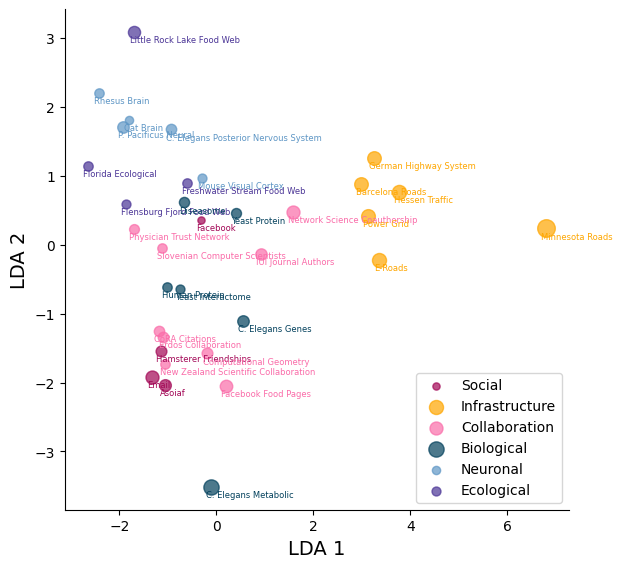

In [42]:
types_dict = {"Biological":cols[0],"Neuronal":cols[3],"Ecological":cols[4],"Social":cols[2],"Collaboration":cols[5],"Infrastructure":cols[1], 'Other':'gray'}


f = plt.figure(figsize=(6.5,6.5))

typecheck = {ty:0 for ty in types}
for n,name in enumerate(true_names):
    x = X[n, 0]
    y = X[n, 1]
    if typecheck[types[n]] == 0:
        plt.scatter(x,y,color = types_dict[types[n]],s = 20*np.max(measure[n,:]),label = types[n],alpha = 0.7,linewidths=1)
        typecheck[types[n]] = 1
    else:
        plt.scatter(x,y,color = types_dict[types[n]],s = 20*np.max(measure[n,:]),label = "",alpha = 0.7,linewidths=1)
    if show_name:
        plt.annotate(name,(x-0.1, y-0.15), fontsize=6, color = types_dict[types[n]])

plt.legend( loc = "lower right",frameon = True)

plt.xlabel("LDA 1",fontsize = 14)
plt.ylabel("LDA 2", fontsize = 14)
sns.despine()


# Hypergraphs

## Display scale-invariance parameters (Fig. 4a)

Load pre-computed SIP for xgi hypergraph datasets

In [2]:
with open("../Data/C_curves/RealData/xgi/SIP.pkl", "rb") as f:
    SIP_hg = pickle.load(f)
with open("../Data/C_curves/RealData/xgi/SIP_cm.pkl", "rb") as f:
    SIP_cm_hg = pickle.load(f)

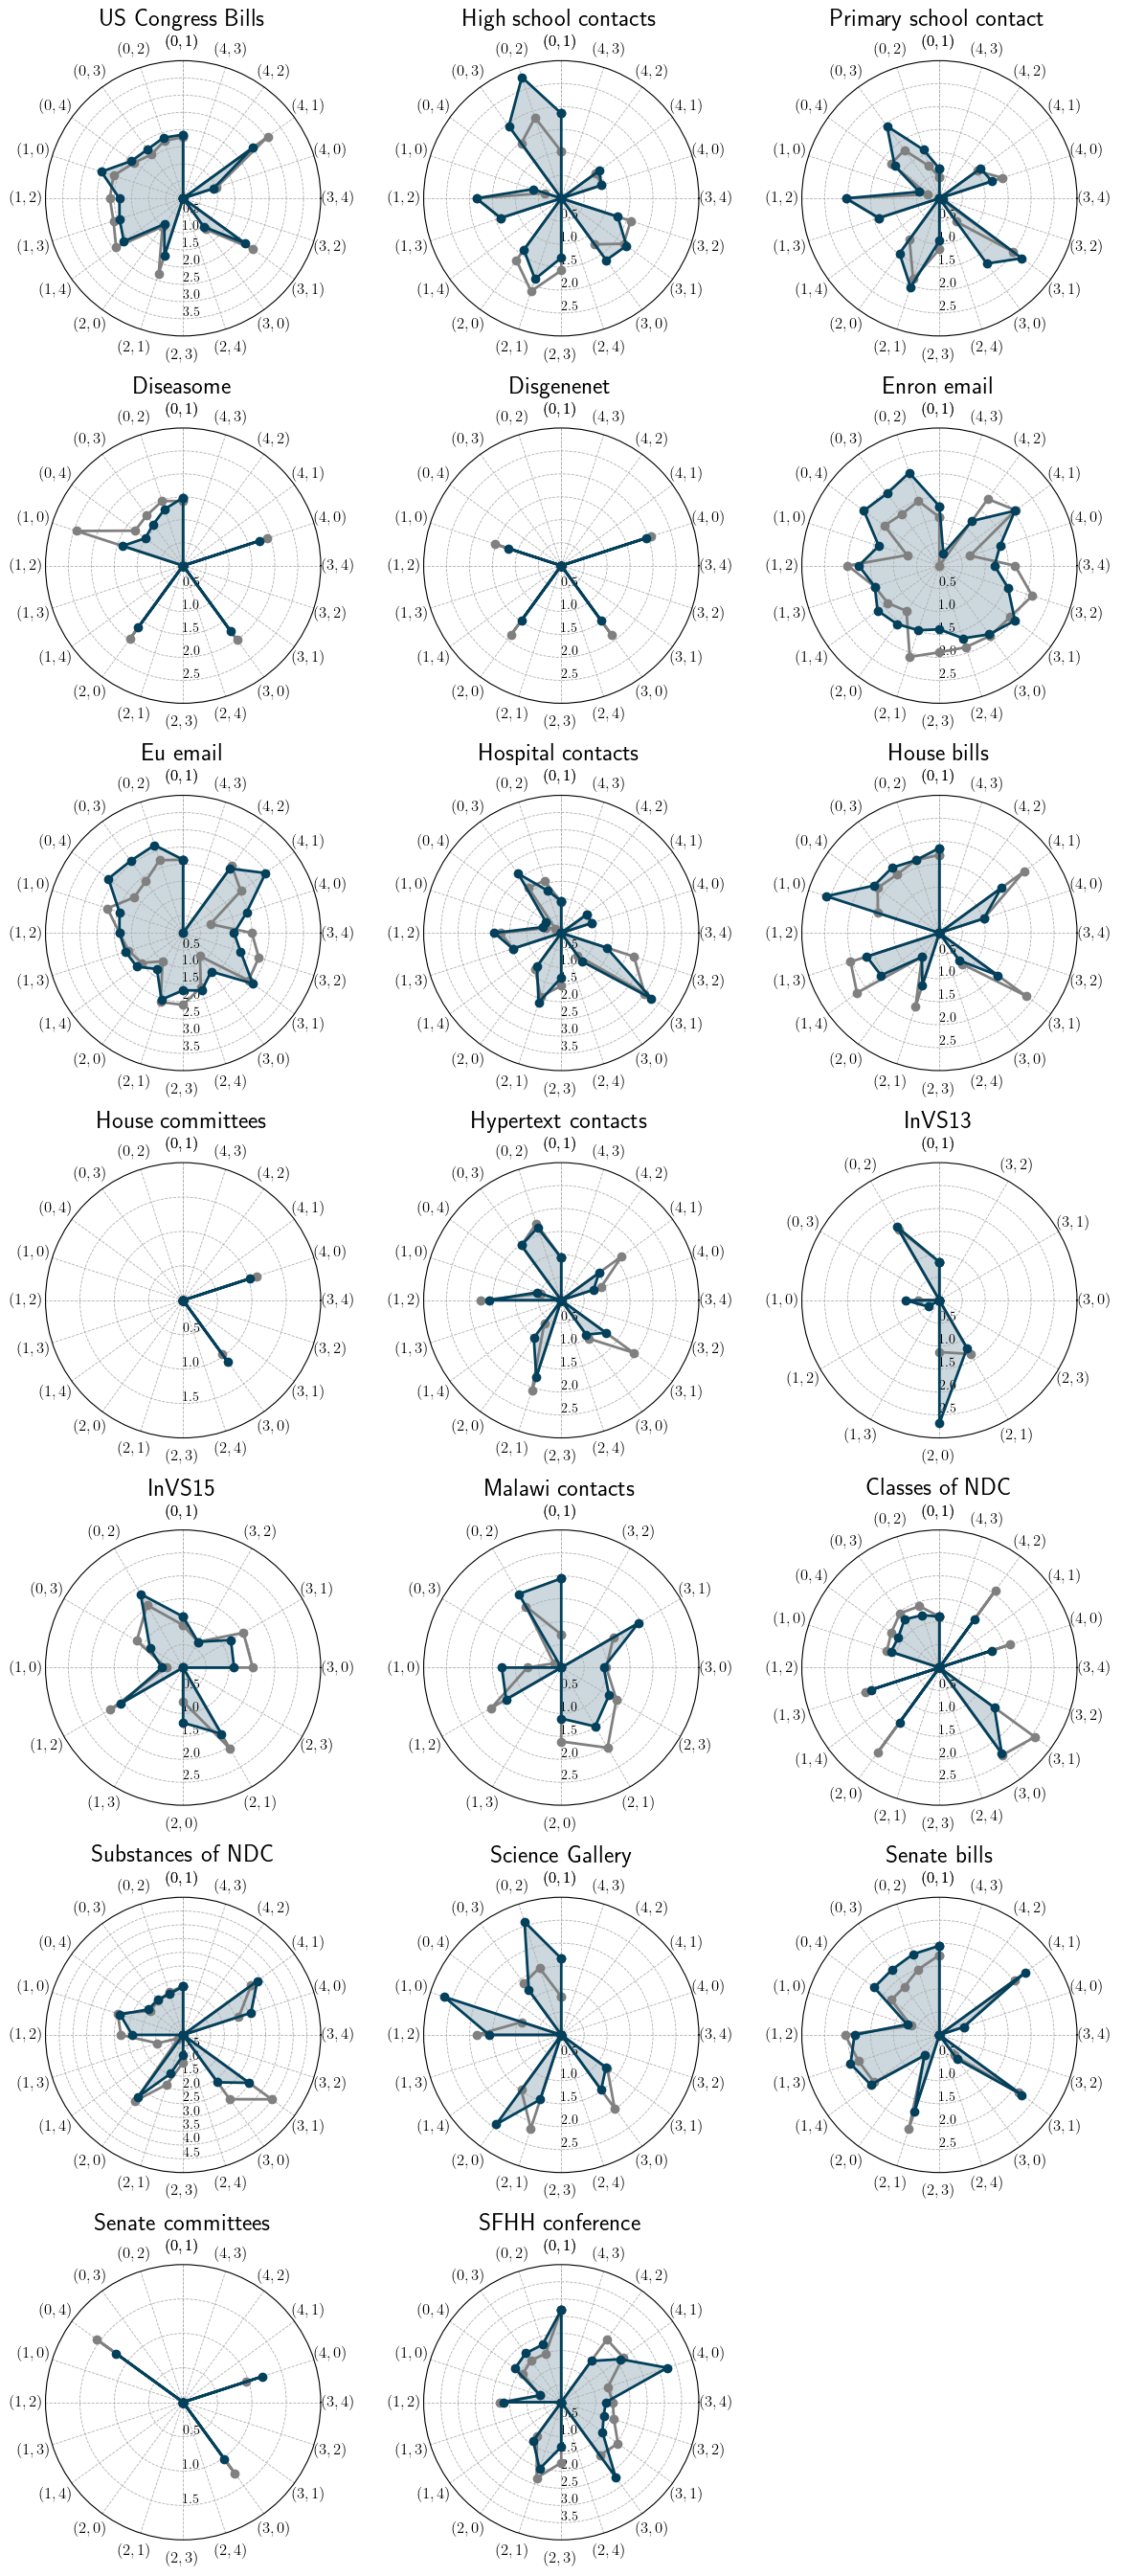

In [24]:
names_hg = ['congress-bills', 'contact-high-school', 'contact-primary-school', 'diseasome', 'disgenenet','email-enron', 'email-eu', 'hospital-lyon', 'house-bills', 'house-committees', 'hypertext-conference', 'invs13', 'invs15', 'malawi-village','ndc-classes', 'ndc-substances', 'science-gallery', 'senate-bills', 'senate-committees','sfhh-conference']
true_names_hg = ['US Congress Bills', 'High school contacts', 'Primary school contact', 'Diseasome', 'Disgenenet', 'Enron email', 'Eu email', 'Hospital contacts', 'House bills', 'House committees', 'Hypertext contacts', 'InVS13', 'InVS15', 'Malawi contacts', 'Classes of NDC', 'Substances of NDC', 'Science Gallery', 'Senate bills', 'Senate committees', 'SFHH conference']
types_hg = ['Collaboration', 'Social', 'Social', 'Biological', 'Biological', 'Social', 'Social', 'Social', 'Collaboration', 'Collaboration', 'Social','Social', 'Social', 'Social', 'Biological', 'Biological', 'Social', 'Collaboration', 'Collaboration', 'Social']

laplacians_types = ['01', '02', '03', '04', '10', '12', '13', '14', '20', '21', '23', '24', '30', '31', '32', '34', '40', '41', '42', '43']

plt.figure(figsize = (12,27))
for idx,name in enumerate(names_hg):
    sip = SIP_hg[name]
    sip_cm = SIP_cm_hg[name]
    lap = list(sip.keys())

    ax = plt.subplot(7,3,idx+1, polar=True)
    angles = np.mod(np.pi/2 + np.linspace(0, 2*np.pi, len(lap), endpoint=False),2*np.pi)
    stats = list(sip.values())
    stats_nm = np.mean(list(sip_cm.values()),axis = 1)

    M =round( max(max(stats),max(stats_nm)) + 0.6)

    angles = np.concatenate((angles,[angles[0]]))

    stats = np.concatenate((stats,[stats[0]]))
    stats_nm = np.concatenate((stats_nm, [stats_nm[0]]))


    ax.plot(angles, stats_nm, 'o-', linewidth=2,color = 'grey')

    ax.plot(angles, stats, 'o-', linewidth=2,color = colors_curves[0])
    ax.fill(angles, stats, alpha=0.2,color = colors_curves[0])

    ax.set_xticks(angles,[f"${{({l[0]},{l[1]})}}$" for l in lap+[lap[0]]],fontsize = 12)
    #ax.tick_params(axis='x', which='major', pad=13)
    ax.grid(linewidth=0.6,linestyle = '--')
    ax.set_rmax(M)
    ax.set_rticks([l for l in np.arange(0.5, M, 0.5)])
    ax.set_rlabel_position(-90)

    ax.set_title(true_names_hg[names_hg.index(name)], fontsize = 18)
    
plt.tight_layout()

## Clustering real networks according to their signature (Fig. 4b)

Load the SIPs up to the third order

In [25]:
lap_types = ['01', '02', '03', '10', '12', '13', '20', '21', '23', '30', '31', '32']

measure_hg = np.zeros((len(names_hg),len(lap_types)))
for n in range(len(names_hg)):
    for l in range(len(lap_types)):
        if lap_types[l] in SIP_hg[names_hg[n]].keys():
            measure_hg[n,l] = SIP_hg[names_hg[n]][lap_types[l]]
    

Perform LDA

In [26]:
lda = LinearDiscriminantAnalysis(n_components=2)
scaler = StandardScaler()
X_hg = scaler.fit_transform(measure_hg)
X_hg = lda.fit_transform(X_hg, types_hg)

In [27]:
show_name = True

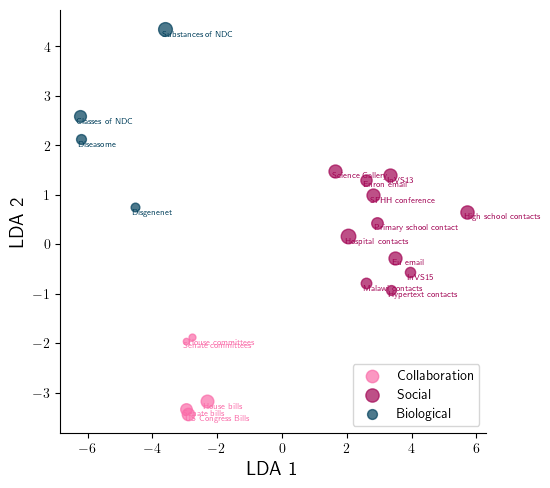

In [28]:
types_dict_hg = {"Biological":cols[0],"Social":cols[2],"Collaboration":cols[5]}

f = plt.figure(figsize=(5.5,5.5))

typecheck = {ty:0 for ty in types_hg}
for n,name in enumerate(true_names_hg):
    x = X_hg[n, 0]
    y = X_hg[n, 1]
    if typecheck[types_hg[n]] == 0:
        plt.scatter(x,y,color = types_dict_hg[types_hg[n]],s = 40*np.max(measure_hg[n,:])-20,label = types_hg[n],alpha = 0.7,linewidths=1)
        typecheck[types_hg[n]] = 1
    else:
        plt.scatter(x,y,color = types_dict_hg[types_hg[n]],s = 40*np.max(measure_hg[n,:])-20,label = "",alpha = 0.7,linewidths=1)
    if show_name:
        plt.annotate(name,(x-0.1, y-0.15), fontsize=6, color = types_dict_hg[types_hg[n]])

plt.legend( loc = "lower right",frameon = True)

plt.xlabel("LDA 1",fontsize = 14)
plt.ylabel("LDA 2", fontsize = 14)
sns.despine()

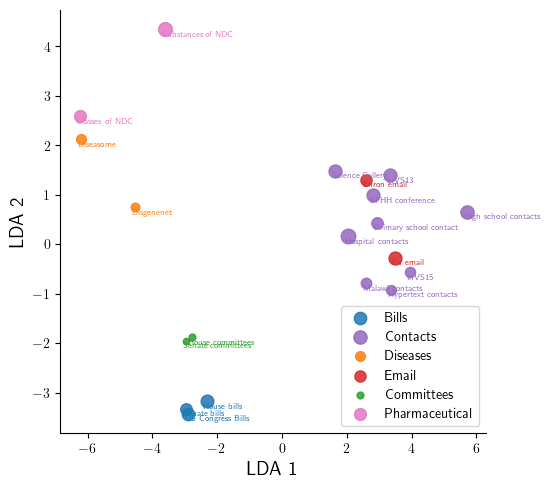

In [29]:
types_hg = ['Bills', 'Contacts', 'Contacts', 'Diseases', 'Diseases', 'Email', 'Email', 'Contacts', 'Bills', 'Committees', 'Contacts','Contacts', 'Contacts', 'Contacts', 'Pharmaceutical', 'Pharmaceutical', 'Contacts', 'Bills', 'Committees', 'Contacts']

types_dict_hg = {'Bills':"tab:blue", 'Committees':"tab:green", 'Contacts':"tab:purple", 'Diseases':"tab:orange", 'Email':"tab:red",'Pharmaceutical':"tab:pink"}

f = plt.figure(figsize=(5.5,5.5))

typecheck = {ty:0 for ty in types_hg}
for n,name in enumerate(true_names_hg):
    x = X_hg[n, 0]
    y = X_hg[n, 1]
    if typecheck[types_hg[n]] == 0:
        plt.scatter(x,y,color = types_dict_hg[types_hg[n]],s = 40*np.max(measure_hg[n,:])-20,label = types_hg[n],alpha = 0.85,linewidths=1)
        typecheck[types_hg[n]] = 1
    else:
        plt.scatter(x,y,color = types_dict_hg[types_hg[n]],s = 40*np.max(measure_hg[n,:])-20,label = "",alpha = 0.85,linewidths=1)
    if show_name:
        plt.annotate(name,(x-0.1, y-0.15), fontsize=6, color = types_dict_hg[types_hg[n]])

plt.legend( loc = "lower right",frameon = True)

plt.xlabel("LDA 1",fontsize = 14)
plt.ylabel("LDA 2", fontsize = 14)
sns.despine()

## Recomputing entropic susceptibilities and null models

In [17]:
import networkx as nx

The datasets references can be found in the paper's supplementary information Table I

In [18]:
# Import the network and compute its clique complex

name = "asoiaf"
f = open(f"../Data/main_datasets/out.{name}","r")
maxd = 2
sc = scomplex.import_network_data(f, maxd)

If ``NULL_MODEL = True`` then compute the null model by randomizing the adjacency graph with a configuration model

In [19]:
NULL_MODEL = True
nrep = 10

In [ ]:
# Define strings which specify the cross-order Laplacians to consider
laplacians_types = ["01","02","10","12","20","21"]

C_curves = []
taumin = -3 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval

if NULL_MODEL:
    for idl,l in enumerate(laplacians_types): 
        print(l)
        C_curves.append([])
        A = scomplex.adjacency_of_order(sc, k=int(l[0]), l=int(l[1]))
        for n in range(nrep):
            # # Configuration model
            Gcm = nx.Graph(A)
            Gcm = nx.configuration_model([val for (__, val) in Gcm.degree()])
            L = nx.laplacian_matrix(Gcm).todense()
            D,__ = np.linalg.eigh(L)
            D = np.abs(D)
            entropic_susceptibility,tau_space,__  = renormalize.compute_entropic_C(D,taumin,taumax,ntau)
            C_curves[idl].append(entropic_susceptibility)
else:
    for idl,l in enumerate(laplacians_types):    
        print(l) 
        L = scomplex.XO_laplacian(sc, k=int(l[0]), l=int(l[1]))
        D,__ = np.linalg.eigh(L)
        D = np.abs(D)
        entropic_susceptibility,tau_space,__  = renormalize.compute_entropic_C(D,taumin,taumax,ntau)
        C_curves.append(entropic_susceptibility)
